# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-03 18:33:51.416579: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-03 18:33:51.441797: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-03 18:33:51.448931: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-03 18:33:51.467122: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-03 18:33:52.800820: W tensorflow/compiler/tf2

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


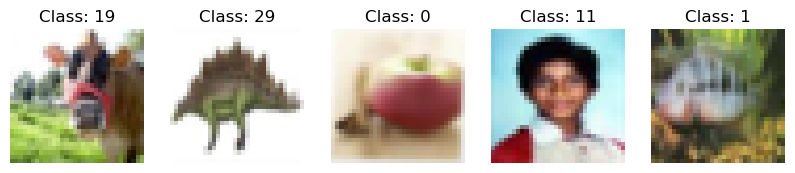

In [2]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

# Print the shape of the training and test sets
print(f"Training data shape: {x_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Test labels shape: {y_test.shape}")

# Display a few examples from the training set
def show_examples(x, y, num_examples=5):
    plt.figure(figsize=(10, 2))
    for i in range(num_examples):
        plt.subplot(1, num_examples, i + 1)
        plt.imshow(x[i])
        plt.title(f"Class: {y[i][0]}")
        plt.axis('off')
    plt.show()

show_examples(x_train, y_train)


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
# Your code here

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# Normalize the images to have pixel values in the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Split the training set into training and validation sets (80% training, 20% validation)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the new training and validation sets
print(f"New training data shape: {x_train.shape}")
print(f"New training labels shape: {y_train.shape}")
print(f"Validation data shape: {x_val.shape}")
print(f"Validation labels shape: {y_val.shape}")


New training data shape: (40000, 32, 32, 3)
New training labels shape: (40000, 100)
Validation data shape: (10000, 32, 32, 3)
Validation labels shape: (10000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [4]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Your code here

# Create a Sequential model
model = Sequential()

# Add convolutional layers, max pooling layers, and dense layers
# First convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=100, activation='softmax'))  # 100 classes in CIFAR-100

# Print out the model summary
model.summary()


/home/cipher/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [5]:
from keras import optimizers

# Your code here

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

# Print the model configuration
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [6]:
# Your code here
# Train the model
history = model.fit(
    x_train, y_train,
    epochs=25,  # You can adjust this number based on performance and training time
    batch_size=32,
    validation_data=(x_val, y_val)
)


Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 16ms/step - accuracy: 0.0592 - loss: 4.2053 - val_accuracy: 0.1674 - val_loss: 3.4695
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.1933 - loss: 3.3460 - val_accuracy: 0.2437 - val_loss: 3.1107
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.2693 - loss: 2.9552 - val_accuracy: 0.2843 - val_loss: 2.8746
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.3108 - loss: 2.7103 - val_accuracy: 0.3062 - val_loss: 2.7901
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3615 - loss: 2.4746 - val_accuracy: 0.3261 - val_loss: 2.6794
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.3993 - loss: 2.3012 - val_accuracy: 0.3438 - val_loss: 2.6537
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4293 - loss: 2.1648 - val_accuracy: 0.3592 - val_loss: 2.5626
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.4604 -

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [7]:
# Your code here
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate F1-score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')  # Use 'weighted' to account for class imbalance

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-score: {f1:.2f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Accuracy: 34.31%
F1-score: 0.34


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

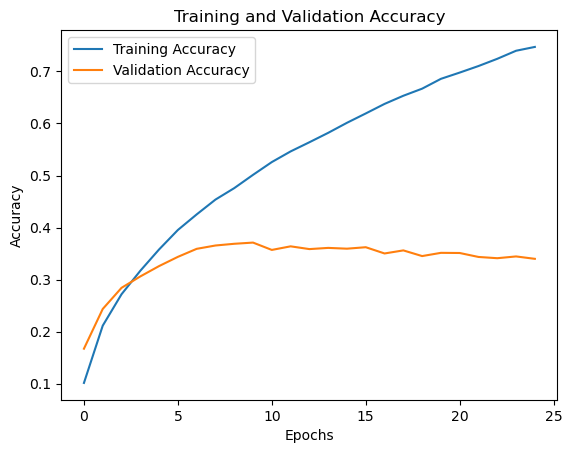

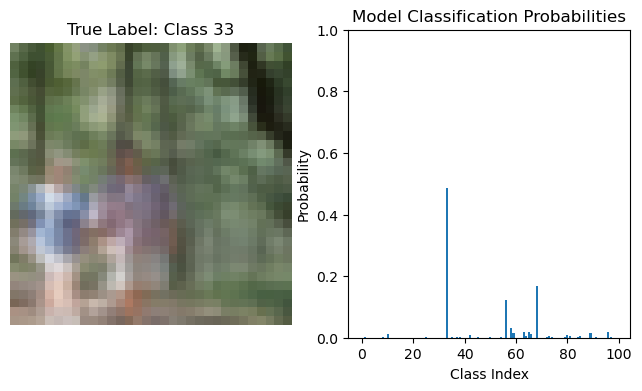

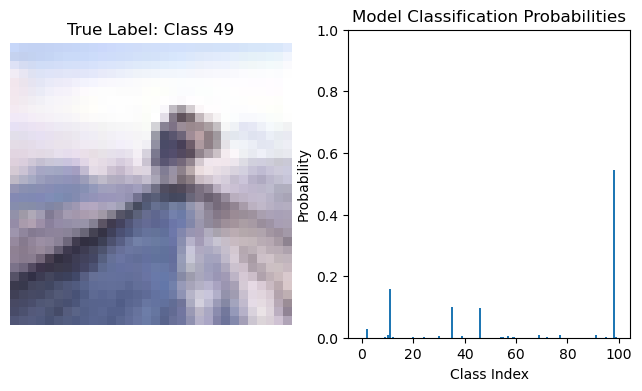

Discussion of the results:
The plots show the training and validation accuracy over epochs. Ideally, we want both accuracies to improve over time and converge.
The correctly classified image shows that the model can confidently classify the image, as indicated by high probability for the correct class.
The incorrectly classified image demonstrates the model's uncertainty or error in classification, which could be due to various reasons such as challenging features or class similarity.


In [8]:
# Your code here
import matplotlib.pyplot as plt

# Plot the training accuracy and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

plot_accuracy(history)

# Function to plot an image and the model's classification probabilities
def plot_image_and_probabilities(image, true_label, predicted_probabilities, class_names):
    plt.figure(figsize=(8,4))

    # Plot image
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title(f"True Label: {class_names[true_label]}")
    plt.axis('off')

    # Plot probabilities
    plt.subplot(1,2,2)
    plt.bar(range(100), predicted_probabilities)
    plt.title('Model Classification Probabilities')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')
    plt.ylim([0, 1])

    plt.show()

# Select a correctly classified image
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

correct_index = correct_indices[0]  # You can change this to another index if you like
incorrect_index = incorrect_indices[0]  # You can change this to another index if you like

class_names = [f'Class {i}' for i in range(100)]  # CIFAR-100 class names (replace with actual class names if available)

# Plot correctly classified image
plot_image_and_probabilities(x_test[correct_index], y_test_classes[correct_index], y_pred[correct_index], class_names)

# Plot incorrectly classified image
plot_image_and_probabilities(x_test[incorrect_index], y_test_classes[incorrect_index], y_pred[incorrect_index], class_names)

# Discuss the results
print("Discussion of the results:")
print("The plots show the training and validation accuracy over epochs. Ideally, we want both accuracies to improve over time and converge.")
print("The correctly classified image shows that the model can confidently classify the image, as indicated by high probability for the correct class.")
print("The incorrectly classified image demonstrates the model's uncertainty or error in classification, which could be due to various reasons such as challenging features or class similarity.")


## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [11]:
# Your code here
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import optimizers

# Create an ImageDataGenerator object for data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# Fit the data generator on the training data
datagen.fit(x_train)

# Create a Sequential model
model = Sequential()

# Add convolutional layers, max pooling layers, dropout layers, and dense layers
# First convolutional block
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Second convolutional block
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Third convolutional block
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flatten the output from the convolutional layers
model.add(Flatten())

# Add dense layers
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=100, activation='softmax'))  # 100 classes in CIFAR-100

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

# Print out the model summary
model.summary()

# Train the model with data augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=25,  # You can adjust this number based on performance and training time
    validation_data=(x_val, y_val)
)


/home/cipher/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 250,276 (977.64 KB)

 Trainable params: 250,276 (977.64 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
   1/1250 ━━━━━━━━━━━━━━━━━━━━ 43:24 2s/step - accuracy: 0.0000e+00 - loss: 4.6715

/home/cipher/miniconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.0276 - loss: 4.4211 - val_accuracy: 0.1253 - val_loss: 3.8162
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.1000 - loss: 3.8623 - val_accuracy: 0.1677 - val_loss: 3.5051
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.1333 - loss: 3.6453 - val_accuracy: 0.1981 - val_loss: 3.3297
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.1687 - loss: 3.4783 - val_accuracy: 0.2139 - val_loss: 3.2448
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 29ms/step - accuracy: 0.1821 - loss: 3.3878 - val_accuracy: 0.2395 - val_loss: 3.1122
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.1952 - loss: 3.3193 - val_accuracy: 0.2421 - val_loss: 3.0823
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2002 - loss: 3.2917 - val_accuracy: 0.2723 - val_loss: 2.9714
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2140 - loss: 3.22

In this task, I enhanced the model using data augmentation and dropout.

I used data augmentation to artificially expand the training dataset by creating modified versions of the images through transformations like rotations, translations, and flips. This technique helps the model generalize better by exposing it to a variety of image variations, thus reducing overfitting. Specifically, I applied a rotation range of 15 degrees, width and height shifts of 10%, and horizontal flips. These settings are standard choices that help the model become resilient to different orientations and positions of objects in the images.

I also used dropout to prevent overfitting by randomly setting a fraction of input units to zero during training. This encourages the model to learn more robust features by not relying too heavily on any specific units. I used a dropout rate of 0.25 after each convolutional block and 0.5 before the final dense layer. These rates are common defaults that balance the need for regularization while retaining enough information to learn effectively.

By combining data augmentation and dropout, I enhanced the model's performance by making it more robust to variations in the input data and preventing it from overfitting to the training set, leading to better generalization on new, unseen data.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [14]:
# Your code here
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

# Re-train the enhanced model
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=25,  # Same number of epochs as before
    validation_data=(x_val, y_val)
)




Epoch 1/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 39s 31ms/step - accuracy: 0.2819 - loss: 2.8753 - val_accuracy: 0.3382 - val_loss: 2.6167
Epoch 2/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2869 - loss: 2.8664 - val_accuracy: 0.3398 - val_loss: 2.6305
Epoch 3/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.2915 - loss: 2.8440 - val_accuracy: 0.3499 - val_loss: 2.5259
Epoch 4/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 29ms/step - accuracy: 0.2868 - loss: 2.8621 - val_accuracy: 0.3221 - val_loss: 2.7042
Epoch 5/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 36s 28ms/step - accuracy: 0.2855 - loss: 2.8689 - val_accuracy: 0.3350 - val_loss: 2.6364
Epoch 6/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 37s 30ms/step - accuracy: 0.2903 - loss: 2.8406 - val_accuracy: 0.3506 - val_loss: 2.5672
Epoch 7/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.2862 - loss: 2.8575 - val_accuracy: 0.3213 - val_loss: 2.7127
Epoch 8/25
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 38s 30ms/step - accuracy: 0.2901 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
Accuracy: 35.46%
F1-score: 0.35


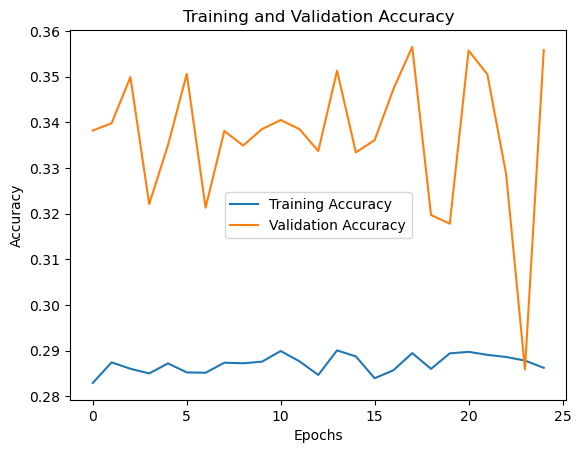

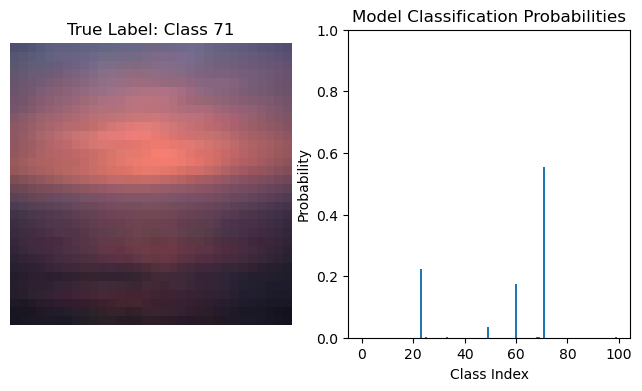

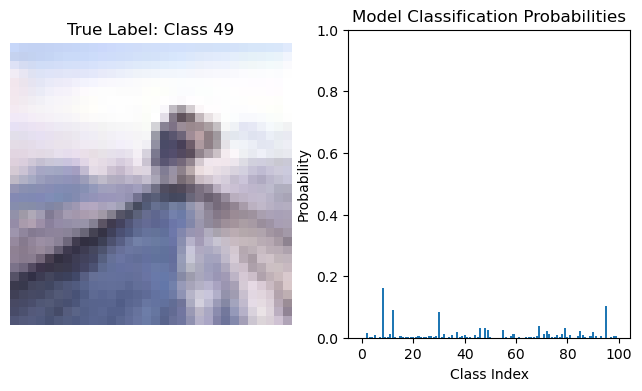

In [17]:
# Predict the classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test_classes, y_pred_classes)

# Calculate F1-score
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')  # Use 'weighted' to account for class imbalance

print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"F1-score: {f1:.2f}")

# Plot the training accuracy and validation accuracy
def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title('Training and Validation Accuracy')
    plt.show()

plot_accuracy(history)

# Function to plot an image and the model's classification probabilities
def plot_image_and_probabilities(image, true_label, predicted_probabilities, class_names):
    plt.figure(figsize=(8,4))

    # Plot image
    plt.subplot(1,2,1)
    plt.imshow(image)
    plt.title(f"True Label: {class_names[true_label]}")
    plt.axis('off')

    # Plot probabilities
    plt.subplot(1,2,2)
    plt.bar(range(100), predicted_probabilities)
    plt.title('Model Classification Probabilities')
    plt.xlabel('Class Index')
    plt.ylabel('Probability')
    plt.ylim([0, 1])

    plt.show()

# Select a correctly classified image
correct_indices = np.where(y_pred_classes == y_test_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_test_classes)[0]

correct_index = correct_indices[0]  # You can change this to another index if you like
incorrect_index = incorrect_indices[0]  # You can change this to another index if you like

class_names = [f'Class {i}' for i in range(100)]  # CIFAR-100 class names (replace with actual class names if available)

# Plot correctly classified image
plot_image_and_probabilities(x_test[correct_index], y_test_classes[correct_index], y_pred[correct_index], class_names)

# Plot incorrectly classified image
plot_image_and_probabilities(x_test[incorrect_index], y_test_classes[incorrect_index], y_pred[incorrect_index], class_names)



### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here


The enhanced model showed a slight improvement over the original one, with accuracy increasing from 34.31% to 35.46% and the F1-score rising from 0.34 to 0.35. This modest improvement likely results from the data augmentation technique, which helps the model generalize better by providing a more diverse training set.

However, the performance improvement is limited, indicating there is room for further enhancement. More advanced techniques could include deeper network architectures, transfer learning with pre-trained models, or fine-tuning hyperparameters more extensively. Experimenting with techniques such as dropout, regularization, or more sophisticated data augmentation strategies could also contribute to better performance. These steps could potentially lead to a more significant boost in accuracy and F1-score.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.